In [ ]:
import sgkit as sg
from sgkit.io.vcf import vcf_to_zarr

In [ ]:
!pip install cyvcf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 4.1 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 


In [ ]:
!pip uninstall dask

Found existing installation: dask 2022.1.0
Uninstalling dask-2022.1.0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/dask-2022.1.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/dask/*
Proceed (y/n)? y
  Successfully uninstalled dask-2022.1.0


In [ ]:
!pip install dask==2021.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.0 MB/s 
  Attempting uninstall: dask
    Found existing installation: dask 2021.1.0
    Uninstalling dask-2021.1.0:
      Successfully uninstalled dask-2021.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.1.0 requires dask==2022.01.0, but you have dask 2021.10.0 which is incompatible.


In [ ]:
!pip install "dask[complete]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sgkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
xr.set_options(display_expand_attrs=False, display_expand_data_vars=True);

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ds = pd.read_csv("Копия simulated data for 668 people and 3 snps - Sheet1.csv")

In [ ]:
ds


,ID,trait,sex,snp1_A/G,snp2_C/T,snp3_G/T
0,APID0001,-0.909573,0,1.0,2.0,1.0
1,APID0002,-1.042890,0,0.0,1.0,2.0
2,APID0003,-0.564743,1,1.0,1.0,0.0
3,APID0004,0.281898,0,1.0,0.0,1.0
4,APID0005,-1.119414,0,0.0,2.0,1.0
...,...,...,...,...,...,...
663,APID0664,-1.395477,0,2.0,2.0,0.0
664,APID0665,0.484364,1,0.0,0.0,0.0
665,APID0666,0.273132,0,1.0,1.0,2.0
666,APID0667,-0.888352,1,1.0,1.0,0.0


In [ ]:
df = ds.dropna()

In [ ]:
ds[ds["snp1_A/G"] == 1].count() 

ID          301
trait       301
sex         301
snp1_A/G    301
snp2_C/T    300
snp3_G/T    300
dtype: int64

In [ ]:
ds[ds["snp1_A/G"] == 0].count() 

ID          244
trait       244
sex         244
snp1_A/G    244
snp2_C/T    241
snp3_G/T    244
dtype: int64

In [ ]:
ds[ds["snp1_A/G"] == 2].count() 

ID          120
trait       120
sex         120
snp1_A/G    120
snp2_C/T    120
snp3_G/T    118
dtype: int64

In [ ]:
p_A1A1_snp1 = 120/658
p_A1A2_snp1 = 301/658
p_A2A2_snp1 = 244/658

In [ ]:
p_A1A1_snp1 + p_A1A2_snp1 +  p_A2A2_snp1

1.0106382978723403

In [ ]:
print(ds[ds["snp2_C/T"] == 1].count())
print(ds[ds["snp2_C/T"] == 0].count())
print(ds[ds["snp2_C/T"] == 2].count())

ID          341
trait       341
sex         341
snp1_A/G    341
snp2_C/T    341
snp3_G/T    339
dtype: int64
ID          220
trait       220
sex         220
snp1_A/G    219
snp2_C/T    220
snp3_G/T    219
dtype: int64
ID          103
trait       103
sex         103
snp1_A/G    101
snp2_C/T    103
snp3_G/T    103
dtype: int64


In [ ]:
p_A1A1_snp2 = 103/658
p_A1A2_snp2 = 341/658
p_A2A2_snp2 = 220/658

In [ ]:
p_A1A1_snp2 + p_A1A2_snp2 +  p_A2A2_snp2

1.0091185410334345

In [ ]:
print(ds[ds["snp3_G/T"] == 1].count())
print(ds[ds["snp3_G/T"] == 0].count())
print(ds[ds["snp3_G/T"] == 2].count())

ID          324
trait       324
sex         324
snp1_A/G    323
snp2_C/T    323
snp3_G/T    324
dtype: int64
ID          222
trait       222
sex         222
snp1_A/G    221
snp2_C/T    220
snp3_G/T    222
dtype: int64
ID          119
trait       119
sex         119
snp1_A/G    118
snp2_C/T    118
snp3_G/T    119
dtype: int64


In [ ]:
p_A1A1_snp3 = 119/658
p_A1A2_snp3 = 324/658
p_A2A2_snp3 = 222/658

In [ ]:
p_A1A1_snp3 + p_A1A2_snp3 +  p_A2A2_snp3

1.0106382978723405

In [ ]:
x = ds.trait
y = ds['snp1_A/G']

In [ ]:
x1 = ds.trait
y1 = ds.sex

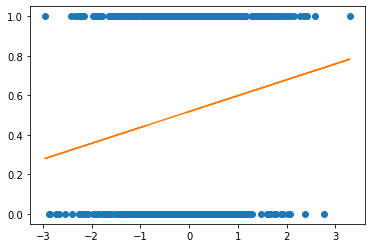

In [ ]:
plt.plot(x1, y1, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x1, y1, 1)

#add linear regression line to scatterplot 
plt.plot(x1, m*x1+b)

In [ ]:
a1 = ()
d1 =